<a href="https://colab.research.google.com/github/Eazing/CapstoneDesign_EmotionDetection/blob/main/DC_Emotion_Recognition_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords

In [ ]:
column_names = ['Emotions', 'Sentence']
df = pd.read_csv('ISEAR.csv', names = column_names)
df.head()

,Emotions,Sentence
joy,On days when I feel close to my partner and ot...,NaN
fear,Every time I imagine that someone I love or I ...,NaN
anger,When I had been obviously unjustly treated and...,NaN
sadness,When I think about the short time that we live...,NaN
disgust,At a gathering I found myself involuntarily si...,NaN


### Data Cleaning

In [ ]:
del df['Sentence']
df = df.reset_index()
df.rename(index=str, columns={"index": "Emotions", "Emotions": "Sentence"}, inplace=True)
df.head()

,Emotions,Sentence
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [ ]:
print(str(df.Emotions.nunique()))
print(str(list(df.Emotions.unique().tolist())))

8
['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'guit']


In [ ]:
df['Emotions'].replace('guit','guilt', inplace=True)
print(str(df.Emotions.nunique()))
print(str(list(df.Emotions.unique())))

7
['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt']


In [ ]:
target_names = list(df.Emotions.unique())
target_names

['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt']

In [ ]:
check_null = df.isnull().values.any()
check_null

False

In [ ]:
print("The shape of data "+ str(df.shape))

The shape of data (7516, 2)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7516 entries, 0 to 7515
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  7516 non-null   object
 1   Sentence  7516 non-null   object
dtypes: object(2)
memory usage: 176.2+ KB


In [ ]:
df.describe()

,Emotions,Sentence
count,7516,7516
unique,7,7449
top,joy,When my grandfather died.
freq,1092,8


In [ ]:
X, y = df['Sentence'], df['Emotions']

### Tokenizes text

In [ ]:
import nltk
nltk.download('punkt')

import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas , nltk
from gensim.models import Word2Vec
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
filename = 'ISEAR_ctg.csv'
df = pandas.read_csv(filename, sep=',')

def nltk_tokenizer(_wd):
  return RegexpTokenizer(r'\w+').tokenize(_wd.lower())

df['Token_Sentence'] = df['Sentence'].apply(nltk_tokenizer)
df.head()

,Emotions,Sentence,Unnamed: 2,Token_Sentence
0,joy,On days when I feel close to my partner and ot...,NaN,"[on, days, when, i, feel, close, to, my, partn..."
1,fear,Every time I imagine that someone I love or I ...,NaN,"[every, time, i, imagine, that, someone, i, lo..."
2,anger,When I had been obviously unjustly treated and...,NaN,"[when, i, had, been, obviously, unjustly, trea..."
3,sadness,When I think about the short time that we live...,NaN,"[when, i, think, about, the, short, time, that..."
4,disgust,At a gathering I found myself involuntarily si...,NaN,"[at, a, gathering, i, found, myself, involunta..."


In [ ]:
common_texts = df['Token_Sentence'].tolist()

model = Word2Vec(
    common_texts,
    size=150,
    alpha=0.025,
    window=10,
    min_count=2,
    sg=1)

model.train(common_texts, total_examples=len(common_texts), epochs=10)

(1091388, 1682870)

In [ ]:
model_result = model.wv.most_similar("happy")
print(model_result)

[('worried', 0.7047356963157654), ('excited', 0.7026646733283997), ('joyful', 0.6962721943855286), ('pleased', 0.6949489116668701), ('joy', 0.6894860863685608), ('joyous', 0.6771424412727356), ('glad', 0.674221932888031), ('selection', 0.6699400544166565), ('atmosphere', 0.661169707775116), ('relief', 0.6589402556419373)]


In [ ]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [ ]:
import re


# tokenizes text
def tokenize(text):
    tokens = [match.group(0) for match in re.finditer(r"\w+|([^\w])\1 * ", text)]
    return tokens

### Stop words

In [ ]:

negations = ['no', 'cannot', 'not', 'none', 'nothing', 'nowhere',
             'neither', 'nor', 'nobody', 'hardly', 'scarcely', 'barely']

""" taken from https://gist.github.com/sebleier/554280 """

neg_stopwords = ["aren't", "couldn't", "hasn't", "didn't", "doesn't", "don't", "hadn't", "isn't", "haven't", "mightn't", "mustn't", "needn't", "shan't", "wasn't", "weren't", "won't", "shouldn't",
                 "wouldn't", "can't", "ain't", "couldnt", "arent", "wasnt", "werent", "cant", "wont", "cant", "wouldnt", "couldnt", "hasnt", 'n\'t']

stopwords = ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren",  "as", "at", "be", "because", "been", "before", "being", "below", "between",
             "both", "but", "by", "can", "couldn",  "d", "did", "didn",  "do", "does", "doesn", "doing", "down", "during", "each", "few", "for", "from", "further",
             "had", "hadn",  "has", "hasn",  "have", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn",
             "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn",  "more", "most", "mustn",  "my", "myself", "needn",  "no", "nor", "not", "now", "o",
             "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan",  "she", "she's", "should", "should've", "shouldn",
             "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up",
             "ve", "very", "was", "wasn",  "we", "were", "weren",  "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won",  "wouldn",  "y",
             "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd",
             "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst",
             "according", "accordingly", "across", "actually", "adj", "affected", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always",
             "among", "amongst", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "arise", "around", "aside",
             "ask", "asking", "auth", "available", "away", "awfully", "b", "became", "become", "becomes", "becoming", "beforehand", "beginnings", "begins", "behind", "believe",
             "beside", "besides", "beyond", "biol", "brief", "c", "ca", "came", "cannot",  "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing",
             "contains", "different", "done", "downwards", "e", "ed", "edu", "eg", "eight", "either", "else", "elsewhere", "enough", "especially",
             "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "followed", "following", "follows",
             "former", "formerly", "forth", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "go", "goes", "gone", "got", "gotten", "h", "happens",
             "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however",
             "id", "ie", "im", "immediate", "inc", "indeed", "instead", "inward", "itd", "it'll", "j", "k", "keep",
             "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely",
             "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "makes", "many", "may", "maybe", "mean", "meanwhile", "merely", "mg", "might",
             "ml", "moreover", "mostly", "mr", "mrs", "much", "must", "n", "na", "name", "namely", "nd", "near", "nearly", "necessary", "need", "needs", "neither", "never",
             "nevertheless", "new", "next", "nine", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "nothing", "nowhere", "obtained", "obviously", "often",
             "oh", "ok", "okay", "old", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "pages", "particular", "particularly", "per",
             "perhaps", "placed", "please", "plus", "possible", "potentially", "pp", "predominantly",
             "primarily", "probably", "promptly", "provides", "q", "que", "quite", "qv", "r", "ran", "rather", "rd", "really", "recently", "ref", "refs",
             "regarding", "regardless", "regards", "relatively", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says",
             "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shes", "showed", "shown", "showns",
             "shows", "significantly", "similarly", "since", "six", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat",
             "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "sub", "successfully", "sup", "sure",
             "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "therere",
             "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "throug", "throughout", "thru", "thus", "til", "together", "took", "toward",
             "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful",
             "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "way", "welcome", "went",  "whatever", "what'll",
             "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose",
             "willing", "wish", "within", "without", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's",  "allow", "allows", "apart",
             "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's",  "changes", "clearly", "concerning", "consequently", "consider", "considering",
             "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored",
             "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious",
             "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all",
             "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "an", "and", "another", "any", "anyhow", "anyone", "anything",
             "anyway", "anywhere", "are", "around", "as", "at", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside",
             "besides", "between", "beyond", "both", "but", "by", "can", "cannot",  "co", "could", "de", "do", "done",
             "down", "during", "each", "eg", "eight", "either", "else", "elsewhere", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except",
             "few", "fifteen", "fify", "first", "five", "for", "former", "formerly", "four", "from", "further", "get", "give", "go", "had", "has",
             "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "ie", "if", "in", "inc",
             "indeed", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "more",
             "moreover", "most", "mostly", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing",
             "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "per", "perhaps",
             "please", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "since", "six", "so", "some",
             "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "take", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there",
             "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to",
             "together", "too", "toward", "towards", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
             "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why",
             "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q",
             "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op",
             "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "0o", "0s", "3a", "3b", "3d", "6b",
             "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl",
             "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da",
             "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es",
             "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj",
             "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js",
             "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl",
             "nn", "nr", "ns", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph",
             "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv",
             "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn",
             "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk",
             "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]

            

### nb_preprocessing

In [ ]:
class Preprocessing:
    def __init__(self):
        self.num_all_sent = 0 # number of all sentences (=denominator for prior prob)
        self.num_labels = {} # occurrences of different labels
        self.words_in_labels = {} # dict in dict: count of different words in each label

        self.wordcounts_per_label = {}


    def load_data(self, filename):

        with open(filename, 'r') as train_text:
            rows = train_text.readlines()
        self.num_all_sent = len(rows)
        #print(self.num_all_sent)
        return rows

    def count_labels(self, rows):
        
        for line in rows:
            #print(line)
            split_line = line.strip().split(',', 1)
            #print(split_line[0])
            if len(split_line) < 2:
                continue 

            elif split_line[0] not in self.num_labels:
                self.num_labels[split_line[0]] = 1

            else:
                self.num_labels[split_line[0]] += 1
        #print(self.num_labels)
        return self.num_labels

    def count_words_in_labels(self, rows):
        count_words = {}
        lst_split_text = []

        for line in rows:
            split_line = line.strip().split(',', 1)
            if len(split_line) < 2: # if it is a empty list
                continue 

            
            split_text = split_line[1].split(' ') #? not optimal solution
            #print(split_text)
            label = split_line[0]
            stripped_words = []
            for char in split_text:
                if char == ' ':
                    continue
                #print(pos, char)
                strip_char = char.strip('".,;?!()[]- ')
                stripped_words.append(strip_char)
            lst_split_text.append(stripped_words)

            #print(lst_split_text)

            if label not in count_words:
                count_words[label] = {}

            else:
                for token in split_text:
                    if token not in count_words[label]:
                        count_words[label][token] = 1
                    else:
                        count_words[label][token] += 1

        self.words_in_labels = count_words

        for label in self.num_labels.keys():
            sum_words_in_label = 0
            for value in count_words[label].values():
                sum_words_in_label += value

            self.wordcounts_per_label[label] = sum_words_in_label
        #print(lst_split_text)
        return lst_split_text

### nnn

In [ ]:
import re
import os

import numpy as np

def clean_str(s):
    """Clean sentence"""
    s = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", s)
    s = re.sub(r"\'s", " \'s", s)
    s = re.sub(r"\'ve", " \'ve", s)
    s = re.sub(r"n\'t", " n\'t", s)
    s = re.sub(r"\'re", " \'re", s)
    s = re.sub(r"\'d", " \'d", s)
    s = re.sub(r"\'ll", " \'ll", s)
    s = re.sub(r",", " , ", s)
    s = re.sub(r"!", " ! ", s)
    s = re.sub(r"\(", " \( ", s)
    s = re.sub(r"\)", " \) ", s)
    s = re.sub(r"\?", " \? ", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = re.sub(r'\S*(x{2,}|X{2,})\S*', "xxx", s)
    s = re.sub(r'[^\x00-\x7F]+', "", s)
    return s.strip().lower()


def load_embedding_weights_as_matrix(vocabulary, max_len_words, embedding_dims):
    model_dir = 'models'
    model_name = f"retrofitted.txt"
    model_path = os.path.join(model_dir, model_name)

    # word -> embedding coefficient mapping
    # so that we can get weights by words
    embedding_dict = dict()

    # load from file
    if os.path.exists(model_path):
        print(f"Loading model -> {model_name}")

        with open(model_path, encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embedding_dict[word] = coefs

    # if the file doesn't exist, download it
    else:
        print("Model doesn't exist, downloading .....")
        # TODO - implement a function to download the model

    # weight matrix for words
    # from word -> weight lookup
    embedding_matrix = np.zeros((max_len_words, embedding_dims))
    for word, index in vocabulary.items():
        if index > max_len_words - 1:
            break
        else:
            embedding_vector = embedding_dict.get(word)
            if embedding_vector is not None:
                embedding_matrix[index] = embedding_vector

    return embedding_matrix


def get_text_and_labels(data):
    texts = [emo.text for emo in data]
    labels = [emo.label for emo in data]

    cleaned_texts = [clean_str(s) for s in texts]

    return cleaned_texts, labels

### Tf-idf

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test  =  train_test_split(X, y, test_size=0.008, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer().fit(X)
X_vect_train = vectorizer.transform(X_train)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
X_transformed = TfidfTransformer(use_idf=True).fit(X_vect_train)
X_transformed_train = X_transformed.transform(X_vect_train)

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
encoded_y_train = encoder.transform(y_train)
# convert integers to one hot encoded
y_categorical_train = np_utils.to_categorical(encoded_y_train)

In [ ]:
X_vect_test = vectorizer.transform(X_test)
X_transformed_test = TfidfTransformer(use_idf=True).fit_transform(X_vect_test)
encoded_y_test = encoder.transform(y_test)
y_categorical_test = np_utils.to_categorical(encoded_y_test)

##Models

### 1. Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_transformed_train, np.argmax(y_categorical_train,1))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pred_nb = nb.predict(X_transformed_test)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
np.set_printoptions(precision=2)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as sm
dict_accuracy_score = {}
def check_metrics(pred, model):
    y = np.argmax(y_categorical_test, 1)
    accuracy_score = sm.accuracy_score(y, pred)
    cm = confusion_matrix(y, pred)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=target_names,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

    plt.show()
    print('\n')

    print("Classification report is")
    
    print(classification_report(y, pred))
    print()
    print("Accuracy score is ", str(accuracy_score))
    dict_accuracy_score[model] = accuracy_score

Confusion matrix, without normalization
[[ 2  2  1  3  0  0  0]
 [ 1  4  1  0  0  0  1]
 [ 0  0  7  0  0  0  0]
 [ 0  0  0  4  1  0  1]
 [ 0  0  0  2 11  1  1]
 [ 2  0  1  0  2  5  0]
 [ 0  0  0  2  0  0  6]]
Normalized confusion matrix
[[0.25 0.25 0.12 0.38 0.   0.   0.  ]
 [0.14 0.57 0.14 0.   0.   0.   0.14]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.67 0.17 0.   0.17]
 [0.   0.   0.   0.13 0.73 0.07 0.07]
 [0.2  0.   0.1  0.   0.2  0.5  0.  ]
 [0.   0.   0.   0.25 0.   0.   0.75]]


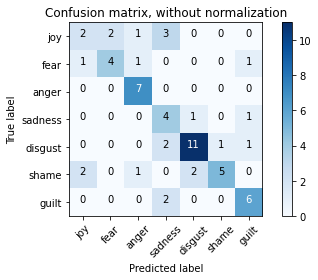

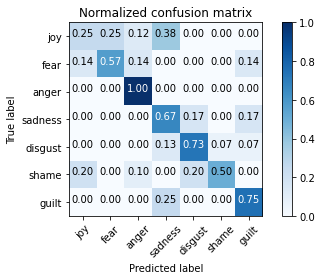



Classification report is
              precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.67      0.57      0.62         7
           2       0.70      1.00      0.82         7
           3       0.36      0.67      0.47         6
           4       0.79      0.73      0.76        15
           5       0.83      0.50      0.62        10
           6       0.67      0.75      0.71         8

    accuracy                           0.64        61
   macro avg       0.63      0.64      0.62        61
weighted avg       0.66      0.64      0.63        61


Accuracy score is  0.639344262295082


In [ ]:
check_metrics(pred_nb, "Naive Bayes")

### 2. Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_transformed_train.toarray(), np.argmax(y_categorical_train,1))
pred_gnb = gnb.predict(X_transformed_test.toarray())

Confusion matrix, without normalization
[[0 2 2 1 0 2 1]
 [0 5 0 0 0 0 2]
 [0 0 4 1 0 0 2]
 [1 1 0 1 0 2 1]
 [2 0 1 1 8 3 0]
 [0 0 0 1 4 5 0]
 [1 1 0 1 0 1 4]]
Normalized confusion matrix
[[0.   0.25 0.25 0.12 0.   0.25 0.12]
 [0.   0.71 0.   0.   0.   0.   0.29]
 [0.   0.   0.57 0.14 0.   0.   0.29]
 [0.17 0.17 0.   0.17 0.   0.33 0.17]
 [0.13 0.   0.07 0.07 0.53 0.2  0.  ]
 [0.   0.   0.   0.1  0.4  0.5  0.  ]
 [0.12 0.12 0.   0.12 0.   0.12 0.5 ]]


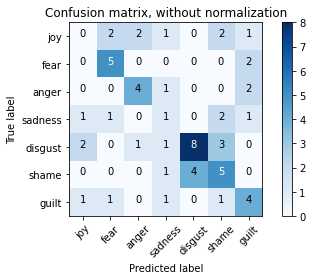

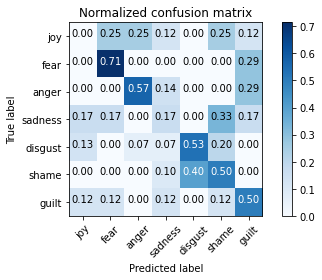



Classification report is
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.56      0.71      0.63         7
           2       0.57      0.57      0.57         7
           3       0.17      0.17      0.17         6
           4       0.67      0.53      0.59        15
           5       0.38      0.50      0.43        10
           6       0.40      0.50      0.44         8

    accuracy                           0.44        61
   macro avg       0.39      0.43      0.40        61
weighted avg       0.43      0.44      0.43        61


Accuracy score is  0.4426229508196721


In [ ]:
check_metrics(pred_gnb, "Gaussian Naive Bayes")

###4. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_transformed_train, np.argmax(y_categorical_train,1))
pred_lr = lr.predict(X_transformed_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix, without normalization
[[ 4  2  1  1  0  0  0]
 [ 1  6  0  0  0  0  0]
 [ 0  0  7  0  0  0  0]
 [ 0  0  0  4  0  1  1]
 [ 2  0  0  1 10  1  1]
 [ 1  1  0  0  1  6  1]
 [ 1  0  0  1  1  0  5]]
Normalized confusion matrix
[[0.5  0.25 0.12 0.12 0.   0.   0.  ]
 [0.14 0.86 0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.67 0.   0.17 0.17]
 [0.13 0.   0.   0.07 0.67 0.07 0.07]
 [0.1  0.1  0.   0.   0.1  0.6  0.1 ]
 [0.12 0.   0.   0.12 0.12 0.   0.62]]


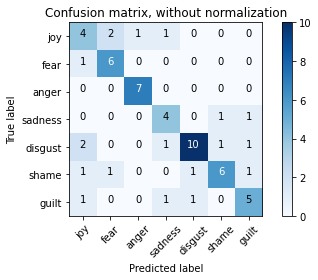

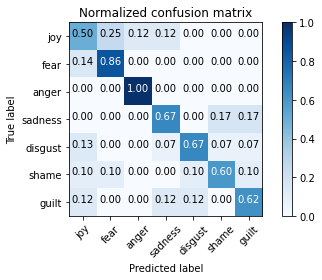



Classification report is
              precision    recall  f1-score   support

           0       0.44      0.50      0.47         8
           1       0.67      0.86      0.75         7
           2       0.88      1.00      0.93         7
           3       0.57      0.67      0.62         6
           4       0.83      0.67      0.74        15
           5       0.75      0.60      0.67        10
           6       0.62      0.62      0.62         8

    accuracy                           0.69        61
   macro avg       0.68      0.70      0.69        61
weighted avg       0.70      0.69      0.69        61


Accuracy score is  0.6885245901639344


In [ ]:
check_metrics(pred_lr, "Logistic Regression")

###5. Support Vector Machine (SVM)

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_transformed_train, np.argmax(y_categorical_train,1))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_svm = clf.predict(X_transformed_test)
clf.score(X_transformed_test, np.argmax(y_categorical_test,1))

0.6885245901639344

Confusion matrix, without normalization
[[ 4  2  1  1  0  0  0]
 [ 0  6  0  0  0  0  1]
 [ 0  0  7  0  0  0  0]
 [ 0  0  0  4  0  1  1]
 [ 2  0  0  1 11  0  1]
 [ 2  1  0  1  1  5  0]
 [ 0  0  0  1  1  1  5]]
Normalized confusion matrix
[[0.5  0.25 0.12 0.12 0.   0.   0.  ]
 [0.   0.86 0.   0.   0.   0.   0.14]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.67 0.   0.17 0.17]
 [0.13 0.   0.   0.07 0.73 0.   0.07]
 [0.2  0.1  0.   0.1  0.1  0.5  0.  ]
 [0.   0.   0.   0.12 0.12 0.12 0.62]]


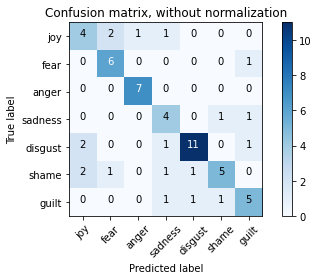

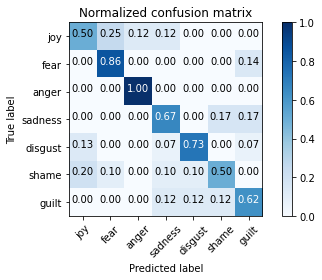



Classification report is
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.67      0.86      0.75         7
           2       0.88      1.00      0.93         7
           3       0.50      0.67      0.57         6
           4       0.85      0.73      0.79        15
           5       0.71      0.50      0.59        10
           6       0.62      0.62      0.62         8

    accuracy                           0.69        61
   macro avg       0.68      0.70      0.68        61
weighted avg       0.70      0.69      0.69        61


Accuracy score is  0.6885245901639344


In [ ]:
check_metrics(pred_svm, "Support Vector Machine")

###6. Decision Tree

In [ ]:
from sklearn import tree        

clf = tree.DecisionTreeClassifier()
clf.fit(X_transformed_train, np.argmax(y_categorical_train,1))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred_tree = clf.predict(X_transformed_test)
clf.predict_proba(X_transformed_test)
clf.score(X_transformed_test, np.argmax(y_categorical_test,1))

0.5409836065573771

Confusion matrix, without normalization
[[3 2 0 3 0 0 0]
 [0 3 1 0 1 0 2]
 [1 0 4 0 1 0 1]
 [1 0 0 4 0 1 0]
 [3 0 1 2 9 0 0]
 [0 2 0 1 0 6 1]
 [0 1 1 1 0 1 4]]
Normalized confusion matrix
[[0.38 0.25 0.   0.38 0.   0.   0.  ]
 [0.   0.43 0.14 0.   0.14 0.   0.29]
 [0.14 0.   0.57 0.   0.14 0.   0.14]
 [0.17 0.   0.   0.67 0.   0.17 0.  ]
 [0.2  0.   0.07 0.13 0.6  0.   0.  ]
 [0.   0.2  0.   0.1  0.   0.6  0.1 ]
 [0.   0.12 0.12 0.12 0.   0.12 0.5 ]]


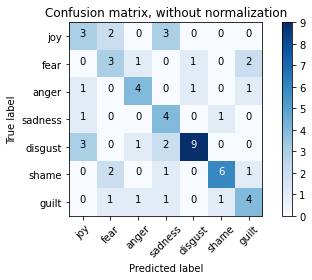

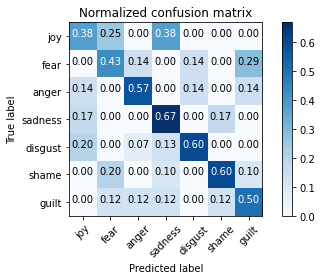



Classification report is
              precision    recall  f1-score   support

           0       0.38      0.38      0.38         8
           1       0.38      0.43      0.40         7
           2       0.57      0.57      0.57         7
           3       0.36      0.67      0.47         6
           4       0.82      0.60      0.69        15
           5       0.75      0.60      0.67        10
           6       0.50      0.50      0.50         8

    accuracy                           0.54        61
   macro avg       0.54      0.53      0.53        61
weighted avg       0.58      0.54      0.55        61


Accuracy score is  0.5409836065573771


In [ ]:
check_metrics(pred_tree, "Decision Tree")

###7. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_transformed_train, np.argmax(y_categorical_train,1))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
clf.feature_importances_
pred_rf = clf.predict(X_transformed_test)

Confusion matrix, without normalization
[[ 5  1  0  0  1  1  0]
 [ 0  3  1  0  1  1  1]
 [ 0  0  6  0  1  0  0]
 [ 0  0  0  4  1  1  0]
 [ 0  1  0  0 10  4  0]
 [ 1  0  0  0  3  6  0]
 [ 1  0  0  1  2  1  3]]
Normalized confusion matrix
[[0.62 0.12 0.   0.   0.12 0.12 0.  ]
 [0.   0.43 0.14 0.   0.14 0.14 0.14]
 [0.   0.   0.86 0.   0.14 0.   0.  ]
 [0.   0.   0.   0.67 0.17 0.17 0.  ]
 [0.   0.07 0.   0.   0.67 0.27 0.  ]
 [0.1  0.   0.   0.   0.3  0.6  0.  ]
 [0.12 0.   0.   0.12 0.25 0.12 0.38]]


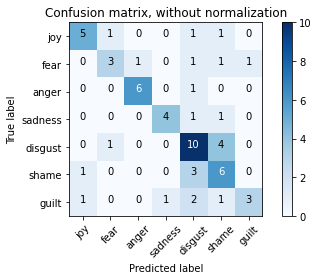

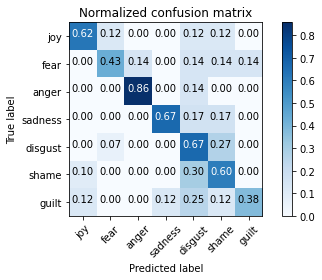



Classification report is
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.60      0.43      0.50         7
           2       0.86      0.86      0.86         7
           3       0.80      0.67      0.73         6
           4       0.53      0.67      0.59        15
           5       0.43      0.60      0.50        10
           6       0.75      0.38      0.50         8

    accuracy                           0.61        61
   macro avg       0.67      0.60      0.62        61
weighted avg       0.64      0.61      0.61        61


Accuracy score is  0.6065573770491803


In [ ]:
check_metrics(pred_rf, "Random Forest Classifier")

###9. K-nearest neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_transformed_train, np.argmax(y_categorical_train,1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
pred_knn = knn.predict(X_transformed_test)

Confusion matrix, without normalization
[[ 2  1  1  3  0  1  0]
 [ 1  2  0  0  0  1  3]
 [ 0  0  5  1  0  0  1]
 [ 1  0  1  1  0  2  1]
 [ 1  0  1  0 10  2  1]
 [ 1  0  1  0  1  7  0]
 [ 0  0  0  2  0  2  4]]
Normalized confusion matrix
[[0.25 0.12 0.12 0.38 0.   0.12 0.  ]
 [0.14 0.29 0.   0.   0.   0.14 0.43]
 [0.   0.   0.71 0.14 0.   0.   0.14]
 [0.17 0.   0.17 0.17 0.   0.33 0.17]
 [0.07 0.   0.07 0.   0.67 0.13 0.07]
 [0.1  0.   0.1  0.   0.1  0.7  0.  ]
 [0.   0.   0.   0.25 0.   0.25 0.5 ]]


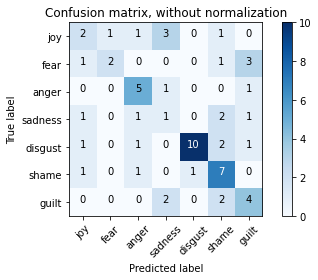

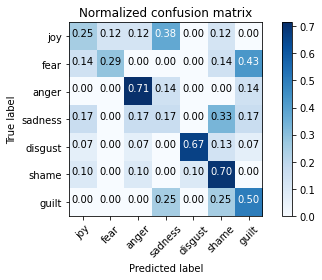



Classification report is
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.67      0.29      0.40         7
           2       0.56      0.71      0.63         7
           3       0.14      0.17      0.15         6
           4       0.91      0.67      0.77        15
           5       0.47      0.70      0.56        10
           6       0.40      0.50      0.44         8

    accuracy                           0.51        61
   macro avg       0.50      0.47      0.46        61
weighted avg       0.55      0.51      0.51        61


Accuracy score is  0.5081967213114754


In [ ]:
check_metrics(pred_knn, "K-nearest neighbor classifier")

###10. Multi-Layer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', \
                    solver='sgd', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=500)

In [ ]:
mlp.fit(X_transformed_train, np.argmax(y_categorical_train,1))    # 훈련하기
pred_mlp = mlp.predict(X_transformed_test)
mlp.score(X_transformed_test, np.argmax(y_categorical_test,1))      # 정확도 평가

0.6721311475409836

Confusion matrix, without normalization
[[ 3  2  1  1  0  0  1]
 [ 1  5  1  0  0  0  0]
 [ 0  0  7  0  0  0  0]
 [ 0  0  0  5  0  0  1]
 [ 1  0  0  1 12  0  1]
 [ 1  1  1  1  1  4  1]
 [ 0  0  0  2  1  0  5]]
Normalized confusion matrix
[[0.38 0.25 0.12 0.12 0.   0.   0.12]
 [0.14 0.71 0.14 0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.83 0.   0.   0.17]
 [0.07 0.   0.   0.07 0.8  0.   0.07]
 [0.1  0.1  0.1  0.1  0.1  0.4  0.1 ]
 [0.   0.   0.   0.25 0.12 0.   0.62]]


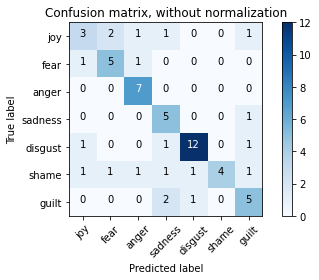

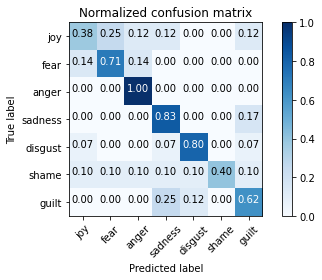



Classification report is
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.62      0.71      0.67         7
           2       0.70      1.00      0.82         7
           3       0.50      0.83      0.62         6
           4       0.86      0.80      0.83        15
           5       1.00      0.40      0.57        10
           6       0.56      0.62      0.59         8

    accuracy                           0.67        61
   macro avg       0.68      0.68      0.65        61
weighted avg       0.71      0.67      0.66        61


Accuracy score is  0.6721311475409836


In [ ]:
check_metrics(pred_mlp, "Multi-Layer Perceptron")

###10. Multi-Layer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', \
                    solver='sgd', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=500)

In [ ]:
mlp.fit(X_transformed_train, np.argmax(y_categorical_train,1))    # 훈련하기
pred_mlp = mlp.predict(X_transformed_test)
mlp.score(X_transformed_test, np.argmax(y_categorical_test,1))      # 정확도 평가

0.7049180327868853

Confusion matrix, without normalization
[[ 3  2  1  1  0  0  1]
 [ 0  5  1  0  0  0  1]
 [ 0  0  7  0  0  0  0]
 [ 0  0  0  5  0  0  1]
 [ 1  0  0  1 11  1  1]
 [ 1  1  0  0  1  7  0]
 [ 0  0  0  1  1  1  5]]
Normalized confusion matrix
[[0.38 0.25 0.12 0.12 0.   0.   0.12]
 [0.   0.71 0.14 0.   0.   0.   0.14]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.83 0.   0.   0.17]
 [0.07 0.   0.   0.07 0.73 0.07 0.07]
 [0.1  0.1  0.   0.   0.1  0.7  0.  ]
 [0.   0.   0.   0.12 0.12 0.12 0.62]]


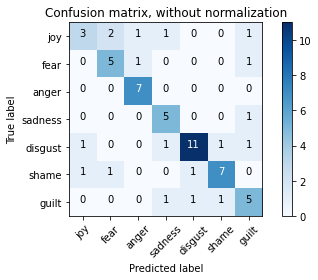

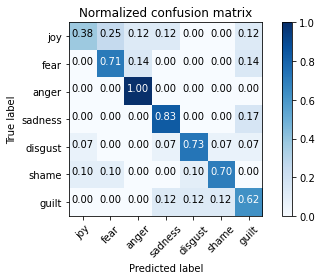



Classification report is
              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.62      0.71      0.67         7
           2       0.78      1.00      0.88         7
           3       0.62      0.83      0.71         6
           4       0.85      0.73      0.79        15
           5       0.78      0.70      0.74        10
           6       0.56      0.62      0.59         8

    accuracy                           0.70        61
   macro avg       0.69      0.71      0.69        61
weighted avg       0.71      0.70      0.70        61


Accuracy score is  0.7049180327868853


In [ ]:
check_metrics(pred_mlp, "Multi-Layer Perceptron")